In [1]:
# datasets
from aitlas.datasets.esri_challenge import EsriChallengeDataset
from aitlas.datasets.dota import DotaDataset

# models
from aitlas.models.fastrcnn_detector import FastRCNN
from aitlas.models.retinanet import RetinaNet

# vizualization
from matplotlib import pyplot as plt
from matplotlib import patches
import matplotlib as mpl
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

## Define either of the two datasets:

### ESRI challenge

In [3]:
train_cfg = {
    "root": "D:\\Documents\\AiTLAS\\aitlas\\ESRI-challenge\\data\\ESRI",
    "subset": "train",
    "subsample_percentage": 0.2,
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "transforms": ["torchvision.transforms.ToTensor"]
}
train_set = EsriChallengeDataset(train_cfg)

test_cfg = {
    "root": "D:\\Documents\\AiTLAS\\aitlas\\ESRI-challenge\\data\\ESRI",
    "subset": "test",
    "subsample_percentage": 0.2,
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "transforms": ["torchvision.transforms.ToTensor"]
}
test_set = EsriChallengeDataset(test_cfg)

The number of images on disk is: 3228
The subsampled number of images is: 645
The number of images on disk is: 520
The subsampled number of images is: 104


### DOTA

In [ ]:
train_cfg = {
    "root": "D:\\Documents\\AiTLAS\\aitlas\\ESRI-challenge\\data\\DOTA",
    "subset": "validation_split",
    "subsample_percentage": 0.01,
    "batch_size": 2,
    "shuffle": True,
    "num_workers": 0,
    "filter_null": True,
    "transforms": ["torchvision.transforms.ToTensor"]
}
train_set = DotaDataset(train_cfg)

test_cfg = {
    "root": "D:\\Documents\\AiTLAS\\aitlas\\ESRI-challenge\\data\\DOTA",
    "subset": "validation_split",
    "subsample_percentage": 0.01,
    "batch_size": 2,
    "shuffle": True,
    "num_workers": 0,
    "filter_null": True, 
    "transforms": ["torchvision.transforms.ToTensor"]
}
test_set = DotaDataset(train_cfg)

## Plot examples of dataset annotations

In [4]:
num_examples = 40
num_images = train_set.__len__()

example_ind = np.random.randint(0, num_images, size = num_examples)

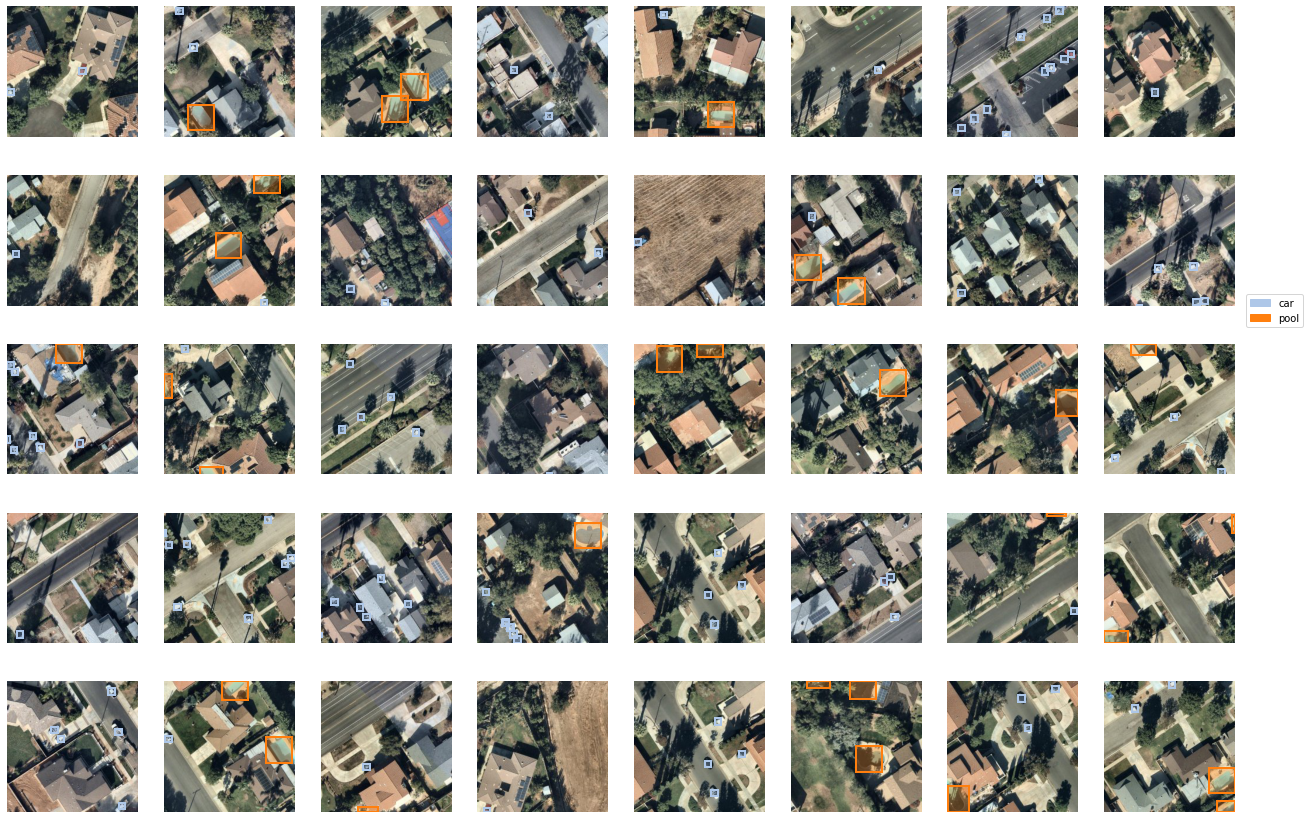

In [5]:
fig, axes = plt.subplots(nrows = 5, ncols = 8, figsize = (22, 15))

for (example_idx, ax) in zip(example_ind, axes.flatten()):
    image, labels = train_set.__getitem__(example_idx)
    img = image.cpu().numpy().copy()
    img = np.rollaxis(img, 0, 3)
    img = (img*255).astype(np.uint16)

    ax.imshow(img)

    for (box, label) in zip(labels['boxes'].cpu().numpy().astype(np.int32), labels['labels'].cpu().numpy()):        
        tab20 = mpl.cm.get_cmap('tab20', 20)
        ax.add_patch(patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1], edgecolor=tab20(label), linewidth = 2, facecolor='none'))
        ax.add_patch(patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1], edgecolor=tab20(label), facecolor=tab20(label), alpha=0.3))
        ax.axis('off')

    
    tab20 = mpl.cm.get_cmap('tab20', 20)
    legend_items = []
    for cat, value in train_set.mappings.items():
        legend_items.append(patches.Patch(color=tab20(value), label=cat))
    plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 4.), handles = legend_items)
        
plt.show()

## Model getter functions

In [6]:
def get_fastrcnn(num_classes = 3):
    model_cfg = {"num_classes": num_classes, "learning_rate": 0.001, "pretrained": True}

    # load a model pre-trained on COCO
    model = FastRCNN(model_cfg)

    model.prepare()

    return model

def get_retinanet(num_classes = 3):
    model_cfg = {"num_classes": num_classes, "learning_rate": 0.001, "pretrained": True}
    
    model = RetinaNet(model_cfg)

    model.prepare()
    
    return model

## Test the performance of FastRCNN

In [7]:
# get the model using our helper function
model = get_fastrcnn(num_classes = 3)

model.train_and_evaluate_model(
    train_dataset=train_set,
    val_dataset=test_set,
    epochs=3,
    model_directory = "./experiment/",
    run_id = "esri-fastrcnn",
    iterations_log = 10
)

2021-09-28 09:53:09,790 INFO Starting training.
training:   3%|▎         | 5/162 [00:05<02:49,  1.08s/it]


KeyboardInterrupt: 

## Test the performance of RetinaNet

In [ ]:
# get the model using our helper function
model = get_retinanet(num_classes = 3)

model.train_and_evaluate_model(
    train_dataset=train_set,
    val_dataset=test_set,
    epochs=20,
    model_directory = "./experiment/",
    run_id = "esri-retinanet",
    iterations_log = 40
)